# Air quality dataset

It's worth understanding more about this dataset before getting started. Check out the [README](https://github.com/informatics-lab/intake_informaticslab#air_quality) for licence information and also review the technical notes linked from there.


## Import some things we'll need and set some plot options

In [1]:
# fix for display issue
import xarray as xr
import numpy as np
import intake
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

## Load a subset of the air quality dataset
We will load one year of data. At the time of writing, this is a dynamic dataset growing daily. 

In reality we are not loading any data, just getting an analysis read representation of the dataset. Data is loaded as needed, such as when plotting.


In [10]:
# Omit the `start_datetime` and `end_datetime` args to get the full dataset.
aq_ds = intake.cat.met_office.air_quality.air_quality_hourly(start_datetime='20200101T0000Z', end_datetime='20201231T2300Z').read_chunked()
aq_ds

<xarray.Dataset>
Dimensions:                  (projection_x_coordinate: 548, projection_y_coordinate: 704, time: 8784)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.38e+05 ... ...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.84e+05 ... ...
  * time                     (time) datetime64[ns] 2020-01-01 ... 2020-12-31T...
Data variables:
    no2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    o3                       (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm10                     (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm2p5                    (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    so2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>

Give some high-level information about the dataset.

In [11]:
print("For the whole air quality dataset above:")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * len(aq_ds.data_vars):,}")
print(f"\tApprox uncompressed data volumes = {len(aq_ds.data_vars)* np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")
print("")
print("For one parameter (e.g. Nitrus Oxide):")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) :,}")
print(f"\tApprox uncompressed data volumes = {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")

For the whole air quality dataset above:
	Number of points 16,943,984,640
	Approx uncompressed data volumes = 542.2GB

For one parameter (e.g. Nitrus Oxide):
	Number of points 3,388,796,928
	Approx uncompressed data volumes = 108.4GB


### Create some plots

#### What was the Nitrus Oxide levels like on 1st Feb 2020 at lunchtime?

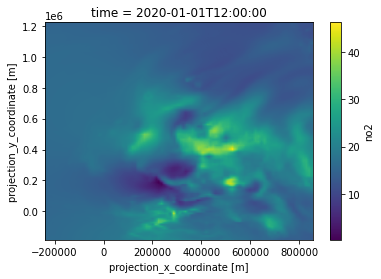

In [12]:
aq_ds.no2.sel(time="2020-01-01T12:00").plot()

#### What was the max NO levels in Feb?

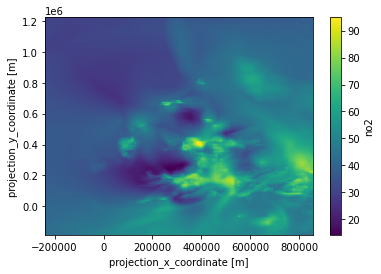

In [11]:
aq_ds.no2.sel(time=slice("2020-02-01T00:00","2020-02-28T23:59")).max(dim='time').plot()